<a href="https://colab.research.google.com/github/eliba12/Practitcal-Data-Science-ML-/blob/main/P10_Space_X_falcon_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Space X-falcon 9 Project***

# Load Libaries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#
from sklearn.metrics import confusion_matrix

In [ ]:
def bi(a):
    b=30+a
    c=b+a
    print(c)

In [ ]:
bi(25)

80


# Plot Confusion Matrix for Different methods

In [ ]:
def plot_confusion_matrix(y,y_predict):
   cm=confusion_matrix(y,y_predict)
   ax=plt.subplot()
   sns.heatmap(cm,annot=True,ax = ax); #annot=True to annotate cells
   ax.set_xlabel('Predicted Value')
   ax.set_ylabel('True Value')
   ax.set_title('Confusion Matrix');
   ax.xaxis.set_ticklabels(['did not land','land']);
   ax.yaxis.set_ticklabels(['did not land', 'landed']);

# Load The Data

In [ ]:
from google.colab import files
uploaded=files.upload()
falcon9=pd.read_csv('dataset_falcon9.csv')

Saving dataset_falcon9.csv to dataset_falcon9.csv


In [ ]:
falcon9.head(10)

In [ ]:
falcon9.iloc[0,1]

'6/4/2010'

In [ ]:
uploaded=files.upload()
Preprocessed = pd.read_csv('preprocessed_dataset.csv')
Preprocessed.head(10)

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,3325.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,2296.000000,1,0,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,7,1316.000000,1,0,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,8,4535.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,4428.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Preprocessed.info()

In [ ]:
X=Preprocessed.drop('Class',axis=1)
Y=Preprocessed['Class']
X

In [ ]:
X['PayloadMass'].mean()

6104.959411764707

In [ ]:
X['PayloadMass'].std()

4694.671719712727

In [ ]:
X['Flights'].mean()

1.788888888888889

In [ ]:
X['Flights'].std()

1.2131715741866367

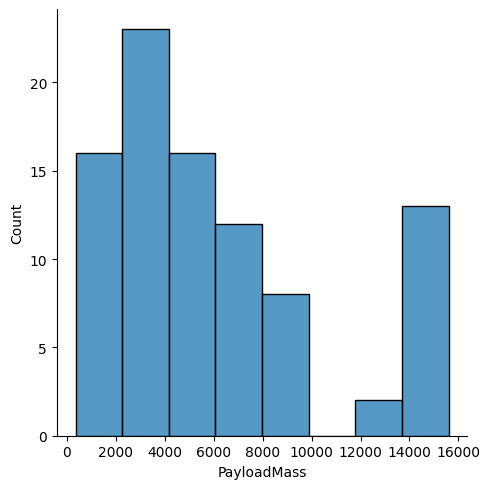

In [ ]:
sns.displot(data=X, x="PayloadMass")

# Standardize data

In [ ]:
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [ ]:
col=X.columns  # columns' names
X=pd.DataFrame(x_scaled,columns=col)
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


# Linear Regression Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30 , random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lgr=LogisticRegression()
parameters ={"C":[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
lgr_cv = GridSearchCV(lgr, parameters,cv=4)
lgr_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("tunned hpyerarameter: ", lgr_cv.best_params_)
print("accuracy: ", lgr_cv.best_score_)

tunned hpyerarameter:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.875


In [ ]:
accuracy_methods=[]
methods=[]
accuracy_methods.append(lgr_cv.score(X_test,Y_test))
methods.append('logistic regression')
lgr_cv.score(X_test,Y_test)

0.8888888888888888

# Confusion Matrix

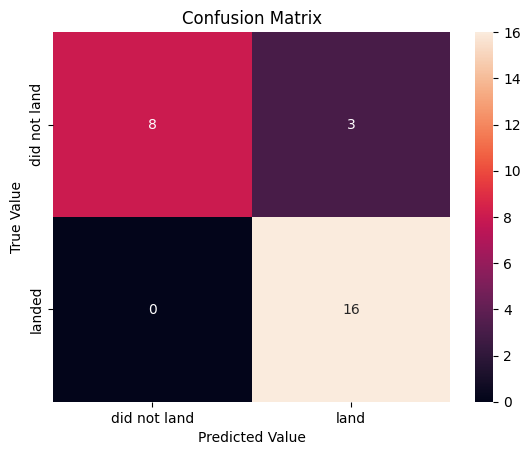

In [ ]:
 ybar=lgr_cv.predict(X_test)
 plot_confusion_matrix(Y_test,ybar)

# Support Vector Machine

In [ ]:
parameters = {'kernel':('linear','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'sigmoid'}
accuracy : 0.9380952380952381


In [ ]:
accuracy_methods.append(svm_cv.score(X_test,Y_test))
methods.append('Support Vector Machine')
svm_cv.score(X_test,Y_test)

In [ ]:
ybar=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, ybar)

# Decision Tree